# Data Analyse of Titanic

## Data import

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd
import statsmodels.api as sm
from statsmodels.nonparametric.kde import KDEUnivariate
from statsmodels.nonparametric import smoothers_lowess
from pandas import Series, DataFrame
from patsy import dmatrix
from sklearn import datasets, svm

In [6]:
df = pd.read_csv('./train.csv')

In [7]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14,1,0,237736,30.0708,NaN,C


In [8]:
import csv

In [9]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 90.5+ KB


In [12]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [14]:
df.Age.median()

28.0

In [15]:
df.Age.mean()

29.69911764705882

In [16]:
df[df.Age > 60]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
33,34,0,2,"Wheadon, Mr. Edward H",male,66.0,0,0,C.A. 24579,10.5000,NaN,S
54,55,0,1,"Ostby, Mr. Engelhart Cornelius",male,65.0,0,1,113509,61.9792,B30,C
96,97,0,1,"Goldschmidt, Mr. George B",male,71.0,0,0,PC 17754,34.6542,A5,C
116,117,0,3,"Connors, Mr. Patrick",male,70.5,0,0,370369,7.7500,NaN,Q
170,171,0,1,"Van der hoef, Mr. Wyckoff",male,61.0,0,0,111240,33.5000,B19,S
252,253,0,1,"Stead, Mr. William Thomas",male,62.0,0,0,113514,26.5500,C87,S
275,276,1,1,"Andrews, Miss. Kornelia Theodosia",female,63.0,1,0,13502,77.9583,D7,S
280,281,0,3,"Duane, Mr. Frank",male,65.0,0,0,336439,7.7500,NaN,Q
326,327,0,3,"Nysveen, Mr. Johan Hansen",male,61.0,0,0,345364,6.2375,NaN,S
438,439,0,1,"Fortune, Mr. Mark",male,64.0,1,4,19950,263.0000,C23 C25 C27,S


In [17]:
df[df.Age > 60][['Sex', 'Pclass', 'Age', 'Survived']]

,Sex,Pclass,Age,Survived
33,male,2,66.0,0
54,male,1,65.0,0
96,male,1,71.0,0
116,male,3,70.5,0
170,male,1,61.0,0
252,male,1,62.0,0
275,female,1,63.0,1
280,male,3,65.0,0
326,male,3,61.0,0
438,male,1,64.0,0


In [18]:
df[df['Age'].isnull()][['Sex', 'Pclass', 'Age']]

,Sex,Pclass,Age
5,male,3,NaN
17,male,2,NaN
19,female,3,NaN
26,male,3,NaN
28,female,3,NaN
29,male,3,NaN
31,female,1,NaN
32,female,3,NaN
36,male,3,NaN
42,male,3,NaN


In [21]:
for i in range(1,4):
    print(i, len(df[ (df['Sex'] == 'male') & (df['Pclass'] == i) ]))

1 122
2 108
3 347


In [22]:
import pylab as P

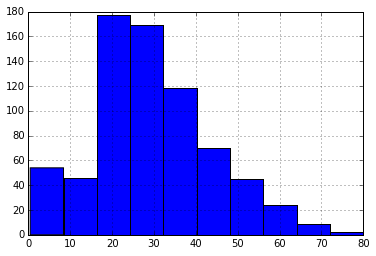

In [23]:
df['Age'].hist()
P.show()

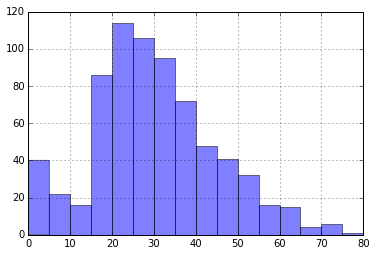

In [26]:
df['Age'].dropna().hist(bins=16, range=(0, 80), alpha= .5)
P.show()

In [30]:
df['Gender'] = df['Sex'].map( lambda x: x[0].upper())

In [31]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Gender
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,NaN,S,M
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C,F
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,NaN,S,F
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S,F
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,NaN,S,M


In [37]:
df['Gender'] = df['Sex'].map( {'female': 0, 'male': 1} ).astype(int)

In [38]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Gender
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,NaN,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,NaN,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S,0
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,NaN,S,1


In [41]:
df['Location'] = df['Embarked'].map( {'S': 0, 'C': 1, 'Q': 2} )

In [43]:
median_ages = np.zeros((2,3))
median_ages

array([[ 0.,  0.,  0.],
       [ 0.,  0.,  0.]])

In [44]:
for i in range(0, 2):
    for j in range(0,3):
        median_ages[i, j] = df[(df['Gender'] == i) &
                               (df['Pclass'] == j+1)]['Age'].dropna().median()

In [45]:
median_ages

array([[ 35. ,  28. ,  21.5],
       [ 40. ,  30. ,  25. ]])

In [46]:
df['AgeFill'] = df['Age']
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Gender,Location,AgeFill
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,NaN,S,1,0,22
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C,0,1,38
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,NaN,S,0,0,26
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S,0,0,35
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,NaN,S,1,0,35


In [47]:
df[ df['Age'].isnull() ][['Gender','Pclass','Age','AgeFill']].head(10)

,Gender,Pclass,Age,AgeFill
5,1,3,NaN,NaN
17,1,2,NaN,NaN
19,0,3,NaN,NaN
26,1,3,NaN,NaN
28,0,3,NaN,NaN
29,1,3,NaN,NaN
31,0,1,NaN,NaN
32,0,3,NaN,NaN
36,1,3,NaN,NaN
42,1,3,NaN,NaN


In [49]:
for i in range(0, 2):
    for j in range(0, 3):
        df.loc[ (df.Age.isnull()) & (df.Gender == i) & (df.Pclass == j+1),
              'AgeFill'] = median_ages[i, j]

In [50]:
df[ df['Age'].isnull() ][['Gender','Pclass','Age','AgeFill']].head(10)

,Gender,Pclass,Age,AgeFill
5,1,3,NaN,25.0
17,1,2,NaN,30.0
19,0,3,NaN,21.5
26,1,3,NaN,25.0
28,0,3,NaN,21.5
29,1,3,NaN,25.0
31,0,1,NaN,35.0
32,0,3,NaN,21.5
36,1,3,NaN,25.0
42,1,3,NaN,25.0


In [51]:
df['AgeIsNull'] = pd.isnull(df.Age).astype(int)

In [53]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Gender,Location,AgeFill,AgeIsNull
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,NaN,S,1,0,22.0,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C,0,1,38.0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,NaN,S,0,0,26.0,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S,0,0,35.0,0
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,NaN,S,1,0,35.0,0
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,1,2,25.0,1
6,7,0,1,"McCarthy, Mr. Timothy J",male,54,0,0,17463,51.8625,E46,S,1,0,54.0,0
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2,3,1,349909,21.0750,NaN,S,1,0,2.0,0
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27,0,2,347742,11.1333,NaN,S,0,0,27.0,0
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14,1,0,237736,30.0708,NaN,C,0,1,14.0,0


## Feature Engineering

In [73]:
df['FamilySize'] = df['SibSp'] + df['Parch']

/home/mathew/anaconda3/lib/python3.4/site-packages/IPython/kernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


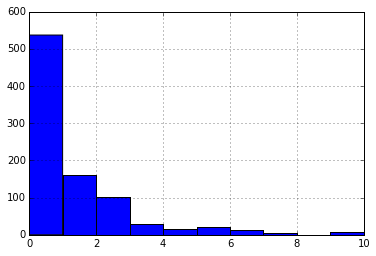

In [58]:
df['FamilySize'].hist()

In [72]:
df['Age*Class'] = df['AgeFill'] * df['Pclass']

/home/mathew/anaconda3/lib/python3.4/site-packages/IPython/kernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [60]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
Gender           int64
Location       float64
AgeFill        float64
AgeIsNull        int64
FamilySize       int64
dtype: object

In [61]:
df.dtypes[df.dtypes.map(lambda x: x=='object')]

Name        object
Sex         object
Ticket      object
Cabin       object
Embarked    object
dtype: object

In [63]:
df = df.drop(['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked'], axis=1)

In [75]:
df = df.drop(['PassengerId'], axis=1)

In [64]:
df = df.drop(['Age'], axis=1)

In [68]:
df = df.dropna()

In [82]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 11 columns):
Survived      889 non-null int64
Pclass        889 non-null int64
SibSp         889 non-null int64
Parch         889 non-null int64
Fare          889 non-null float64
Gender        889 non-null int64
Location      889 non-null float64
AgeFill       889 non-null float64
AgeIsNull     889 non-null int64
FamilySize    889 non-null int64
Age*Class     889 non-null float64
dtypes: float64(4), int64(7)
memory usage: 83.3 KB


In [76]:
train_data = df.values
train_data

array([[  0. ,   3. ,   1. , ...,   0. ,   1. ,  66. ],
       [  1. ,   1. ,   1. , ...,   0. ,   1. ,  38. ],
       [  1. ,   3. ,   0. , ...,   0. ,   0. ,  78. ],
       ..., 
       [  0. ,   3. ,   1. , ...,   1. ,   3. ,  64.5],
       [  1. ,   1. ,   0. , ...,   0. ,   0. ,  26. ],
       [  0. ,   3. ,   0. , ...,   0. ,   0. ,  96. ]])

In [77]:
from sklearn.ensemble import RandomForestClassifier

In [78]:
forest = RandomForestClassifier(n_estimators=100)

In [79]:
forest = forest.fit(train_data[0::, 1::], train_data[0::, 0])

In [199]:
df_test = pd.read_csv('./test.csv')
# add Gender column
df_test['Gender'] = df_test['Sex'].map( {'female': 0, 'male': 1} ).astype(int)
# add location column
df_test['Location'] = df_test['Embarked'].map( {'S': 0, 'C': 1, 'Q': 2} )
# add AgeFill
print(median_ages)
df_test['AgeFill'] = df_test['Age']
for i in range(0, 2):
    for j in range(0, 3):
        df_test.loc[ (df_test.Age.isnull()) & (df_test.Gender == i) & (df_test.Pclass == j+1),
              'AgeFill'] = median_ages[i, j]
# add AgeIsNull
df_test['AgeIsNull'] = pd.isnull(df_test.Age).astype(int)
# add Family Size
df_test['FamilySize'] = df_test.Parch + df_test.SibSp
# add Age*Class
df_test['Age*Class'] = df_test.AgeFill * df_test.Pclass
# drop the unrelevant columns
passenger_id = df_test['PassengerId']
df_test = df_test.drop(['PassengerId', 'Name', 'Sex', 'Age', 'Ticket', 'Embarked', 'Cabin'], axis=1)
df_test.info()

[[ 35.   28.   21.5]
 [ 40.   30.   25. ]]
<class 'pandas.core.frame.DataFrame'>
Int64Index: 418 entries, 0 to 417
Data columns (total 10 columns):
Pclass        418 non-null int64
SibSp         418 non-null int64
Parch         418 non-null int64
Fare          417 non-null float64
Gender        418 non-null int64
Location      418 non-null int64
AgeFill       418 non-null float64
AgeIsNull     418 non-null int64
FamilySize    418 non-null int64
Age*Class     418 non-null float64
dtypes: float64(3), int64(7)
memory usage: 35.9 KB


In [161]:
df_test[df_test['Pclass']==3].Fare.mean()

12.459677880184334

In [162]:
df_test.loc[df_test['Fare'].isnull(), 'Fare'] = df_test[df_test['Pclass']==3].Fare.mean()
df_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 418 entries, 0 to 417
Data columns (total 10 columns):
Pclass        418 non-null int64
SibSp         418 non-null int64
Parch         418 non-null int64
Fare          418 non-null float64
Gender        418 non-null int64
Location      418 non-null int64
AgeFill       418 non-null float64
AgeIsNull     418 non-null int64
FamilySize    418 non-null int64
Age*Class     418 non-null float64
dtypes: float64(3), int64(7)
memory usage: 35.9 KB


In [163]:
test_data = df_test.values
test_data

array([[   3. ,    0. ,    0. , ...,    0. ,    0. ,  103.5],
       [   3. ,    1. ,    0. , ...,    0. ,    1. ,  141. ],
       [   2. ,    0. ,    0. , ...,    0. ,    0. ,  124. ],
       ..., 
       [   3. ,    0. ,    0. , ...,    0. ,    0. ,  115.5],
       [   3. ,    0. ,    0. , ...,    1. ,    0. ,   75. ],
       [   3. ,    1. ,    1. , ...,    1. ,    2. ,   75. ]])

In [164]:
output = forest.predict(test_data)

In [207]:
output = output.astype(int)


In [208]:
df_result = df_test

In [209]:
df_result['Survived'] = output
df_result

,Pclass,SibSp,Parch,Fare,Gender,Location,AgeFill,AgeIsNull,FamilySize,Age*Class,Survived
0,3,0,0,7.8292,1,2,34.5,0,0,103.5,0
1,3,1,0,7.0000,0,0,47.0,0,1,141.0,0
2,2,0,0,9.6875,1,2,62.0,0,0,124.0,0
3,3,0,0,8.6625,1,0,27.0,0,0,81.0,1
4,3,1,1,12.2875,0,0,22.0,0,2,66.0,0
5,3,0,0,9.2250,1,0,14.0,0,0,42.0,0
6,3,0,0,7.6292,0,2,30.0,0,0,90.0,0
7,2,1,1,29.0000,1,0,26.0,0,2,52.0,0
8,3,0,0,7.2292,0,1,18.0,0,0,54.0,1
9,3,2,0,24.1500,1,0,21.0,0,2,63.0,0


In [210]:
df_result = df_result[['Survived']]

In [211]:
df_result.loc[:, 'PassengerId'] = passenger_id

/home/mathew/anaconda3/lib/python3.4/site-packages/pandas/core/indexing.py:249: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
/home/mathew/anaconda3/lib/python3.4/site-packages/pandas/core/indexing.py:415: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [212]:
df_result

,Survived,PassengerId
0,0,892
1,0,893
2,0,894
3,1,895
4,0,896
5,0,897
6,0,898
7,0,899
8,1,900
9,0,901


In [213]:
df_result.to_csv('result.csv', sep=',', index=False)